In [1]:
import pandas as pd
import seaborn as sns
#from tqdm import tqdm_notebook as tqdm
from tqdm.notebook import tqdm
#from tqdm import tqdm as tqdmflat

import spacy
from spacy.lang.en import English
import os

from simpletransformers.classification import ClassificationModel

import logging


In [2]:
PATH = 'data/'
biz=pd.read_csv(os.path.join(PATH,"yelp_business.csv"))
reviews=pd.read_csv(os.path.join(PATH,"yelp_review.csv"))

In [3]:


col = ['neighborhood', 'address', 'latitude', 'longitude', 'stars']
biz.drop(columns=col, inplace=True)    

biz.categories = biz.categories.apply(lambda x: x.split(";"))

biz = biz[
    (biz.city == 'Cleveland') & 
    (biz.state == 'OH') & 
    (biz.is_open == 1) & 
    (biz.categories.apply(
        lambda x: True if 'Restaurants' in x else False
    ))]



In [4]:
df = pd.merge(reviews, biz, how='inner', on='business_id')

In [5]:
df

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,name,city,state,postal_code,review_count,is_open,categories
0,OPZsR2jCG72uoDNjU71DQQ,qYbWTWH5leltA0bzWAOnmA,meXjqyhTNLFmknY39y2sMg,5,2014-09-11,Solid beers -- Christmas Ale defines my holida...,1,1,1,"""Great Lakes Brewing Company""",Cleveland,OH,44113,751,1,"[Breweries, Restaurants, Event Planning & Serv..."
1,fxGwEiSYDtAen8BNuVGGxg,8Az_JgEpXqAii_5EDkw2tw,meXjqyhTNLFmknY39y2sMg,3,2013-10-13,Meh. It was OK. A bartender the night before...,0,1,0,"""Great Lakes Brewing Company""",Cleveland,OH,44113,751,1,"[Breweries, Restaurants, Event Planning & Serv..."
2,Gweb4pADeQ26WnaiKEZ7GQ,T9tEic49JZjN4nCUcDvrRQ,meXjqyhTNLFmknY39y2sMg,4,2014-01-15,"Oh Christmas Ale, oh Christmas Ale, how lovely...",1,1,1,"""Great Lakes Brewing Company""",Cleveland,OH,44113,751,1,"[Breweries, Restaurants, Event Planning & Serv..."
3,P1vhwPI56SeZEz10ywaS7w,W1p8_CFW5FISSihmQo5Qzw,meXjqyhTNLFmknY39y2sMg,3,2012-02-09,What is the big deal about this place? The foo...,2,1,1,"""Great Lakes Brewing Company""",Cleveland,OH,44113,751,1,"[Breweries, Restaurants, Event Planning & Serv..."
4,1kQvQlBX0V5_rGddBh9-rQ,Y_PP05RRdzbKRYfDCCfh8w,meXjqyhTNLFmknY39y2sMg,5,2017-04-30,Great Lakes Brewing Company is one of my favor...,0,0,0,"""Great Lakes Brewing Company""",Cleveland,OH,44113,751,1,"[Breweries, Restaurants, Event Planning & Serv..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56905,0vzkpZuQKms6FW8VoJwwGA,pCeiu_FRmS_F_UNGfqiikg,xJfM3UbnaQkLPEMZgLNuyQ,3,2017-11-09,This Wendy's in the past was deserving of one ...,0,0,0,"""Wendy's""",Cleveland,OH,44105,3,1,"[Restaurants, Burgers, Fast Food]"
56906,dUHdSKwCkU-pIuTGJBqt7A,aw2m9p2dPo5OXIx4pQGUPg,xJfM3UbnaQkLPEMZgLNuyQ,4,2016-10-20,I went to get a taco salad because I heard so ...,0,0,0,"""Wendy's""",Cleveland,OH,44105,3,1,"[Restaurants, Burgers, Fast Food]"
56907,CMTHLl4s03tES0Nfskuspg,ORceu2UCCWxyRzvoElYotw,4_sXnBAHU3lGxVfPUn0CNQ,1,2017-02-13,I can't call Number 1 Kitchen the worst Chines...,0,0,0,"""Number 1 Kitchen""",Cleveland,OH,44111,3,1,"[Chinese, Restaurants]"
56908,IP1_iBoZ9fb3Rp5WqS8uAw,bOFmXLfqyLYbvuo_52bdgQ,4_sXnBAHU3lGxVfPUn0CNQ,1,2017-03-23,My family and I have been ordering food from h...,0,0,0,"""Number 1 Kitchen""",Cleveland,OH,44111,3,1,"[Chinese, Restaurants]"


In [6]:
df_polar = df[df.stars.isin([1,5])]
df_polar = df_polar[['text', 'stars']]

In [7]:
df_polar = df_polar.sample(2000,weights=1/df_polar.stars)

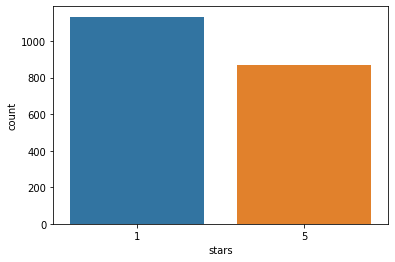

In [8]:
sns.countplot(df_polar.stars);

In [9]:
df_polar

,text,stars
5843,"It saddens me so, but I have to write a negati...",1
36062,I ordered takeout via Skip the Dishes. Worst T...,1
45159,My reviews are normally positive but I just ca...,1
2881,Mother's Day Experience: Well. The place looks...,1
41172,Great for a date! Husband and I bowled for an ...,5
...,...,...
49887,It's been well over 10 years I've eaten here a...,5
48292,"Where to start, my girlfriend and I recently v...",1
19508,The lemon curd pancakes and breakfast burrito ...,5
53423,This is the best Italian restaurant in the Cle...,5


In [10]:



nlp = English()  # just the language with no model
sentencizer = nlp.create_pipe("sentencizer")
nlp.add_pipe(sentencizer)
doc = nlp.pipe(df_polar.text, n_process=12, batch_size=100)
#col_list = ['sents', 'score']
#df_sents = pd.DataFrame(columns=col_list)
#df_polar['splits'] = list(doc)




In [11]:
df_polar_sents = pd.DataFrame(columns=['sent', 'score', 'og_text'])
for dfp, dc in tqdm(zip(df_polar.iterrows(), doc), total=len(df_polar)):

    for sent in dc.sents:
        strr = dfp[1].stars
        strr = 1 if strr == 5 else 0
        snt = sent.string
        df_temp = pd.Series({'sent': snt, 'score': strr, 'og_text':dfp[1].text })
        df_polar_sents = df_polar_sents.append(df_temp, ignore_index=True)
doc.close()

In [12]:
df_polar_sents['sent'] = df_polar_sents.sent.str.strip()


In [13]:
df_polar_sents

,sent,score,og_text
0,"It saddens me so, but I have to write a negati...",0,"It saddens me so, but I have to write a negati..."
1,Saturday was a very special day for me.,0,"It saddens me so, but I have to write a negati..."
2,"So, my husband phoned ahead and made reservati...",0,"It saddens me so, but I have to write a negati..."
3,"And, we were going to select other things on t...",0,"It saddens me so, but I have to write a negati..."
4,"When we arrived, we were seated upstairs, the ...",0,"It saddens me so, but I have to write a negati..."
...,...,...,...
16939,My wife and I have been coming here forever an...,1,This is the best Italian restaurant in the Cle...
16940,Oh and the bread with the seasoned butter is s...,1,This is the best Italian restaurant in the Cle...
16941,If you want to get ripped off then come here.,0,If you want to get ripped off then come here. ...
16942,Pay cash only!,0,If you want to get ripped off then come here. ...


In [14]:
from sklearn.model_selection import train_test_split

traindf, testdf = train_test_split(df_polar_sents) #(df_polar_sents)

In [15]:
testdf

,sent,score,og_text
15612,The only reason I didn't send it back is becau...,0,"AWFUL. I ordered a sirloin, which, granted, is..."
6979,How is everything so delicious?,1,I seriously can't understand how the cashew mi...
11837,I just paid $50 to not bowl for 45 minutes!,0,Awful. Rude. Unaccommodating. Ridiculously exp...
3357,They had a great app that we enjoyed.,0,The pupusas were ok - a little bland. They ha...
11690,"Recently, at ""Oysterfest"" held there, (luckily...",0,"For a truly disgusting dining experience, be s..."
...,...,...,...
2425,Visited SOHO for the first time as an out-of-t...,0,Visited SOHO for the first time as an out-of-t...
765,"Love bowling with friends, love Italian food, ...",0,We had a group reservation for 2 lanes for 7-9...
7275,And I was not at all impressed by what I saw b...,0,It's sad to see that restaurants cut corners j...
16382,"Definitely, no team work\nUnfriendliness & unp...",0,First time there this evening.\nSat at the bar...


In [16]:
model_args = {
    "num_train_epochs": 4,
    'reprocess_input_data': True, 
    'overwrite_output_dir': True,
    "fp16": False,
    'regression': True,
    
}

# Create a ClassificationModel
model = ClassificationModel(
    "roberta", "roberta-base", args=model_args,  num_labels=1,
)

In [17]:

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

In [18]:
model.train_model(traindf[['sent', 'score']])

/home/koryd/miniconda3/envs/yelp/lib/python3.7/site-packages/simpletransformers/classification/classification_model.py:251: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


Running loss: 0.870059

/opt/conda/conda-bld/pytorch_1587428398394/work/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha)


Running loss: 0.318420

/home/koryd/miniconda3/envs/yelp/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.093559


/home/koryd/miniconda3/envs/yelp/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


Running loss: 0.412761


Running loss: 0.347916


Running loss: 0.002614



INFO:simpletransformers.classification.classification_model: Training of roberta model complete. Saved to outputs/.


In [19]:
model.predict(('food is so good!',))

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


(array(1.0243143, dtype=float32), array(1.0243143, dtype=float32))

In [20]:
predictions, raw_outputs = model.predict(["I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the screen?" * 25])
print(predictions)
print(raw_outputs)

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.



0.016454447
0.016454447


In [21]:
result, model_outputs, wrong_predictions = model.eval_model(testdf)

/home/koryd/miniconda3/envs/yelp/lib/python3.7/site-packages/simpletransformers/classification/classification_model.py:668: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


INFO:simpletransformers.classification.classification_model:{'eval_loss': 0.12544131660493496}


In [22]:
for i in wrong_predictions:
    print(i.label, i.text_a, i.text_b)

0 The only reason I didn't send it back is because I was paying with a Groupon. None
1 How is everything so delicious? None
0 I just paid $50 to not bowl for 45 minutes! None
0 They had a great app that we enjoyed. None
0 Recently, at "Oysterfest" held there, (luckily manned by mostly outside vendors) I made the grave mistake of getting a last-minute burger from them, and was treated to a pasty, pink-slime-esque, incomprehensively greasy slab on an ice-cold bun coated with a layer of pus-like white cheese- the "only way it's available" according to the "chef." " None
1 Love this place!!! None
0 They are using cheap canned and frozen ingredients. None
0 The waitress then had assumed I didn't want them. None
0 Unzipped his pants and peed. None
1 Highlights - Ginko Usuzukuri (Hamachi), Oysters 3 ways, Madai, and Sake Toro Aburi. None
0 I ordered a pasta dish that I consumed in literally 4 small bites. None
0 Just left this restaurant and will never return. None
1 Fresh ingredients and gre

0 And do you know why I didn't eat here? None
0 Low quality cut of meat and seared with a blow torch on the top for cosmetics and to melt the cheese. None
1 The New Fashioned, (yes, I like bourbon), was familiar but had a great spicy twist and vibrant orange and cherry flavors without losing the bourbon. None
1 The decor at this restaurant was actually pretty decent, and quite amusing. None
1 I always loved their food here. None
1 Delicious! None
0 Then the manager shows up and said that the staff was over twice to take entree orders which had happenned  20 minutes before I had to call the front desk. None
1 One in our party had swordfish for his entrée and said it was the best he'd ever had. None
0 I might add, the one ounce of steak sauce she recieved was so vile (like ketchup, mustard, and cigarette ashes mixed together) that we had to stop at at Starbuck's to get something to cleanse our pallettes. ( None
1 All in all, my friends and I had a great evening. None
1 So good! None
0 Pr

1 Our waitress Michelle was very nice and informative. None
1 Flavors were all fun- go here, super fun! None
0 We ordered the lamb shank and chicken with olives, mushrooms, and capers. None
0 An hour . None
1 They also have coconut milk for drinks! None
0 Very dry as they toasted the spinach wrap and didn't put anything on it. None
0 As i do with most new places, I order the baseline items for pure comparison - and as a first round we ordered a tuna role, yellowtail and scallion and one of their special roles. None
0 I've made a huge mistake. None
0 Inspired by the quality of the meal, I decided to purchase a 50.00 gift card for my sister and brother-in-law, who live in town (he works in Ohio City). None
0 Made reservations for dinner and when we arrived, Bianca, the hostess, said they didnt have any record of our reservations. None
1 The parking garage was seriously confusing though. None
0 And in such a prime location! None
0 Not to mention he said there was barely any alcohol in his

0 So sad, people that work in the food industry 
Are so unhappy & miserable they can't even fake a smile.... None
0 The server also did not write down the Order and forgot to remove onions and got our side completely wrong. None
0 Both times we were turned away as they said the place was full.....2\/3 of the tables were empty both times. None
0 After having the waiter passed me like 5 times, I got up to the bar and asked where can I placed my order, bartender: oh with me. None
1 They have a piano and lounge singer that sounds like Frank Sinatra, and various other acts. None
1 I love having servers that actually like to interact with their customers. None
1 The best part is that steak isn't their only specialty! None
1 It's my go to breakfast when I order from here. None
0 This place needs a complete management and training overhaul. None
0 I honestly don't know how you could screw the meal up worse than it was. None
1 Huge portions, absolutely delicious food! None
1 Though it is a past

0 Excuse me? None
1 Fun environment. None
1 The dish looked RED. None
0 We are major foodies and enjoy dining out. None
0 Tony do you know the meaning of customer service? None
0 Washed it down with a Vanilla Milkshake...it was good, not too extra extra sweet, lol I can actually taste milk (lol I hope that made sense). None
1 back it again with the delicious pupusas. ( None
0 It takes a lot for me to post a review and unfortunately this was a particularly bad experience. None
0 They opened a new one in North Olmsted  that I am willing to try. None
0 Was told by the hostess when the time came "a couple more minutes". None
1 The second time around we had the pear and apple salad as well as the Lobster. None
0 It was gross, it looked as if someone pored a little bit of canned kidney beans, black beans and chickpeas over it and melted shredded cheddar cheese on top of it. None
0 Food was sub-par! None
1 I absolutely loved them, however for my cousin they were a little too spicy as they had

1 A special thank you to Stephanie Pack, GM at Red Steakhouse, Downtown Cleveland. None
0 But wait, it gets better. None
1 Fantastic restaurant in the Hilton Cleveland! None
0 Walked right in @ 10 pm on Saturday night, it was busy but no wait. None
0 I will never ever go there anymore. None
1 I am sometimes worried that fois gras will overpower the rest of the meal, but I had nothing to fear here. None
0 We snacked on the chips and salsa and decided to order a $38 pitcher of blood orange margaritas. None
0 They gave us an awkward space for 20 people which was too spread out and not accommodating for socializing but instead segregated everyone. None
0 Okay wait, why in the hell is it called a Rhino burger? None
1 I also ordered the Devilled eggs, 3 of which were dyed pink with beetroot, and each one had a little tuft of prosciutto stuck in the middle of the yolk. None
0 Can not believe they have 86 reviews & 4 stars. None
0 We left we couldn't believe how we were treated !!!!!!! None
1 

In [23]:
model.predict(testdf.sent)

KeyError: 0

In [24]:
len(wrong_predictions)

4236

In [26]:
len(testdf)

4236